In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

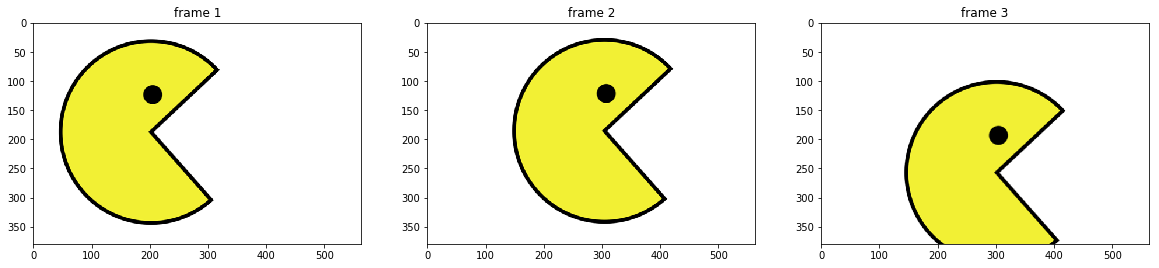

In [10]:
frame_1 = cv2.imread('images/pacman_1.png')
frame_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2RGB)
frame_2 = cv2.imread('images/pacman_2.png')
frame_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2RGB)
frame_3 = cv2.imread('images/pacman_3.png')
frame_3 = cv2.cvtColor(frame_3,cv2.COLOR_BGR2RGB)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('frame 1')
ax1.imshow(frame_1)
ax2.set_title('frame 2')
ax2.imshow(frame_2)
ax3.set_title('frame 3')
ax3.imshow(frame_3)

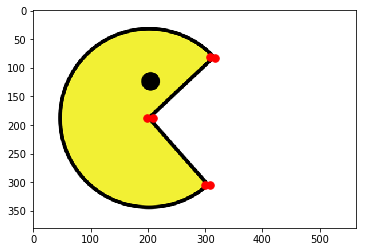

In [12]:
gray_1 = cv2.cvtColor(frame_1, cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(frame_2, cv2.COLOR_RGB2GRAY)
gray_3 = cv2.cvtColor(frame_3, cv2.COLOR_RGB2GRAY)

pts_1 = cv2.goodFeaturesToTrack(gray_1,mask=None,maxCorners=10,qualityLevel=0.2,minDistance=5,blockSize=5)

plt.imshow(frame_1)
for p in pts_1:
    plt.plot(p[0][0], p[0][1],'r.',markersize=15)


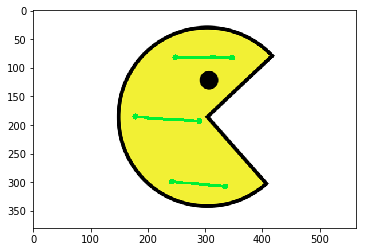

In [16]:
pts_2, match, err = cv2.calcOpticalFlowPyrLK(gray_1,gray_2,pts_1,None,winSize=(5,5),maxLevel=2,
                                            criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10,0.03))

good_new = pts_2[match==1]
good_old = pts_1[match==1]

mask = np.zeros_like(frame_2)

for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.circle(mask,(a,b),5,(200),-1)
    mask = cv2.line(mask,(a,b),(c,d),(200),3)
    
composite_im = np.copy(frame_2)
composite_im[mask!=0]=[0]
plt.imshow(composite_im)

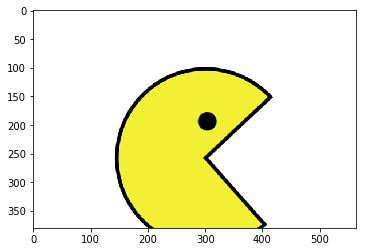

In [20]:
pts_3, match, err = cv2.calcOpticalFlowPyrLK(gray_2,gray_3,pts_2,None,winSize=(5,5),maxLevel=2,
                                            criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10,0.03))

good_new = pts_3[match==1]
good_old = pts_2[match==1]

mask = np.zeros_like(frame_3)

for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.circle(mask,(a,b),5,(200),-1)
    mask = cv2.line(mask,(a,b),(c,d),(200),3)
    
composite_im = np.copy(frame_3)
composite_im[mask!=0]=[0]
plt.imshow(composite_im)